# Employee Exit Survey

## Aims of Analysis
Stakeholders have asked for answers to these questions:

Period of Service
- Are short serving employees resigning due to dissatisfaction? 
- Are long serving employees resigning due to dissatisfaction? 

Age of Employee
- Are younger employees resigning due to dissatisfaction?
- Are older employees resigning due to dissatisfaction?

## Data
Two data sets will be used:

#### [TAFE employee exit survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)
Staff feedback provides the Department with valuable information on the reasons why
employees resign or retire. The information is used to inform attraction and retention initiatives
and to improve work practices across the Department to ensure the Department is considered
an employer of choice.

The TAFE Exit Survey was developed to effectively canvass the opinions and attitudes of
departing employees to identify a wide range of operational, organisational and personal
variables affecting the decision to leave. 
#### [Employee Exit Survey - DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
Staff feedback provides the Department with valuable information on the reasons why
employees resign or retire. The information is used to inform attraction and retention initiatives
and to improve work practices across the Department to ensure the Department is considered
an employer of choice.

The DETE Exit Survey was developed to effectively canvass the opinions and attitudes of
departing employees to identify a wide range of operational, organisational and personal
variables affecting the decision to leave

## Summary of Results
1. Short service
2. Long service
3. Young
4. Older

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dete = pd.read_csv('dete_survey_2014.csv', encoding='cp1252')
tafe = pd.read_csv('tafe_survey_2013.csv', encoding='cp1252')

# Investigate the Dataset

## DETE Dataset

### Findings

The DETE dataset has the following basic characteristics:

#### Types
- A mix of data, some of which is useful to **dissatisfaction** and some which is not. We can drop the latter columns without any consequence.
- Likert values in order of frequency: A, SA, N, D, SD, M
    - From the TAFE dataset we know that these stand for:
        - SA = Strongly Agree
        - A  = Agree
        - N  = Neutral
        - D  = Disagree
        - SD = Strongly Disagree
        - M  = Not Applicable
- Years only in date columns
- Boolean columns for key dissatisfaction data.
    
#### Completeness
- Columns which are nearly entirely empty and therefore can be dropped:
    - 51  Aboriginal                           16 non-null     object
    - 52  Torres Strait                        3 non-null      object
    - 53  South Sea                            7 non-null      object
    - 54  Disability                           23 non-null     object
    - 55  NESB                                 32 non-null     object
- Columns 50% to 80% empty which can perhaps be easily filled, or dropped - though this would mean losing correlations to managers:
    - 6   Classification                       455 non-null    object
    - 8   Business Unit                        126 non-null    object
- Columns 90% full which can be filled with mean or mode values depending on what they are.

In [6]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

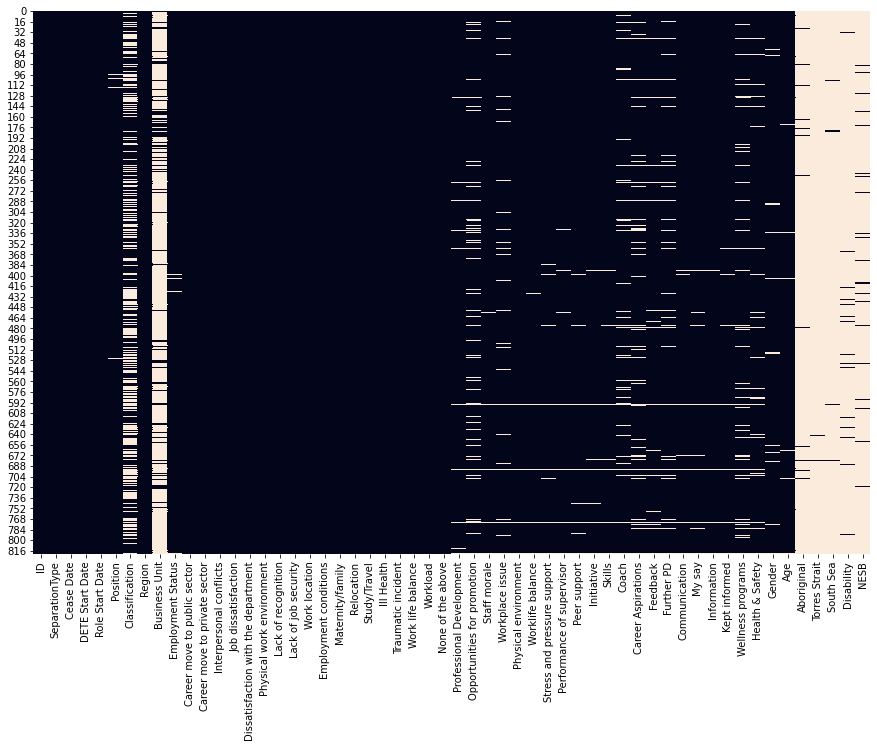

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(dete.isnull(), cbar=False)
plt.show()

In [25]:
dete['Professional Development'].value_counts()

A     413
SA    184
N     103
D      60
SD     33
M      15
Name: Professional Development, dtype: int64

In [29]:
dete['DETE Start Date'].loc[10:30]

10          1999
11          2009
12          1998
13          1967
14          2007
15          1995
16    Not Stated
17          1996
18          2006
19          1989
20          1982
21          1980
22          1997
23          1973
24          1981
25          1995
26          1974
27          2005
28          1989
29          1975
30          1989
Name: DETE Start Date, dtype: object

In [31]:
dete['SeparationType'].loc[10:30]

10                          Age Retirement
11    Resignation-Move overseas/interstate
12               Resignation-Other reasons
13                          Age Retirement
14              Resignation-Other employer
15        Voluntary Early Retirement (VER)
16               Resignation-Other reasons
17                          Age Retirement
18                          Age Retirement
19                          Age Retirement
20              Resignation-Other employer
21               Resignation-Other reasons
22               Resignation-Other reasons
23               Resignation-Other reasons
24                          Age Retirement
25               Resignation-Other reasons
26                          Age Retirement
27              Resignation-Other employer
28                          Age Retirement
29                          Age Retirement
30                          Age Retirement
Name: SeparationType, dtype: object

In [88]:
dete['Skills'].loc[10:30]

10     A
11     N
12    SA
13     A
14    SA
15     A
16     A
17     A
18     A
19     A
20     N
21    SA
22     A
23     D
24    SA
25     N
26     A
27     A
28    SA
29     A
30     A
Name: Skills, dtype: object

In [89]:
dete.iloc[10:30, 10:15]

,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department
10,False,False,False,True,False
11,False,False,False,False,False
12,False,False,False,False,False
13,False,False,False,False,False
14,False,False,False,True,True
15,False,False,False,False,False
16,False,False,False,False,False
17,False,False,False,False,False
18,False,False,False,False,False
19,False,False,False,False,False


## TAFE Dataset

### Findings

The TAFE dataset has the following general characteristics:

#### Types
- Detailed questions which help us fill in some gaps from the DETE set.
- A range of columns, some of which are relevant to **dissatisfaction** while some others can be dropped.
- Likert values for views on the institute and work unit views.
    - SA = Strongly Agree
    - A  = Agree
    - N  = Neutral
    - D  = Disagree
    - SD = Strongly Disagree
    - M  = Not Applicable
- Years only in date columns
- Boolean columns for key dissatisfaction data.

#### Completeness
- 50% (approx) null values for some columns where 2 are of particular value. Imputation challenging with only 50% return, but not impossible depending on the distribution.
    - Contributing Factors. Career Move - Public Sector
    - Contributing Factors. Career Move - Private Sector
    - Contributing Factors. Career Move - Self-employment
    - Contributing Factors. Ill Health
    - Contributing Factors. Maternity/Family
    - Contributing Factors. **Dissatisfaction**
    - Contributing Factors. **Job Dissatisfaction**
    - Contributing Factors. Interpersonal Conflict
    - Contributing Factors. Study
    - Contributing Factors. Travel
    - Contributing Factors. Other
    - Contributing Factors. NONE
- 60% to 80% null values for the majority of the rest of the columns.
- 40% (approx) of rows are nearly 100% null


In [91]:
700/800

0.875

In [57]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

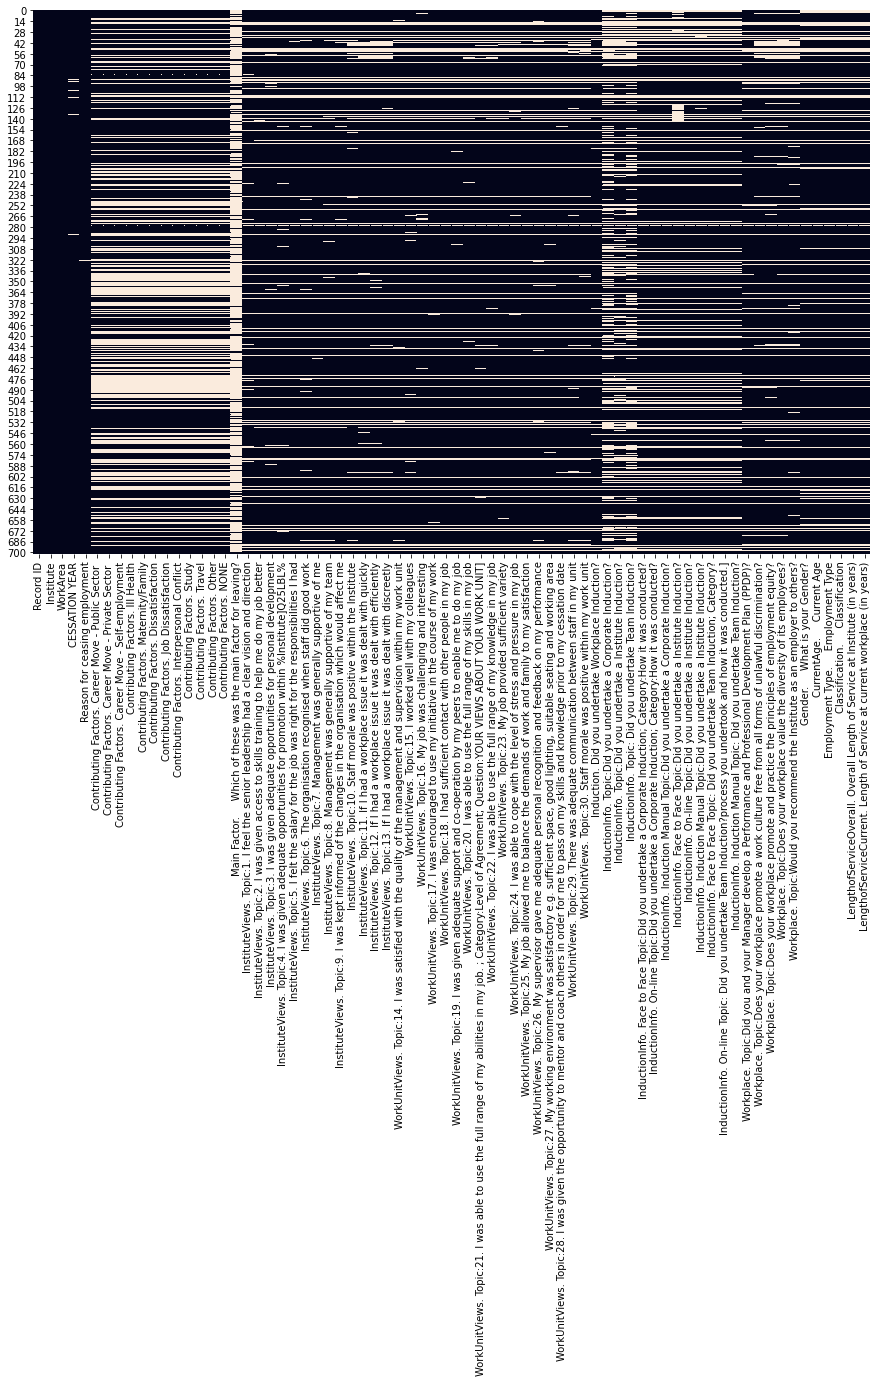

In [92]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(tafe.isnull(), cbar=False)
plt.show()

In [83]:
tafe.iloc[10:30, [5,10,11]]

,Contributing Factors. Career Move - Public Sector,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
10,Career Move - Public Sector,-,-
11,NaN,NaN,NaN
12,NaN,NaN,NaN
13,-,-,-
14,-,Contributing Factors. Dissatisfaction,Job Dissatisfaction
15,-,-,-
16,NaN,NaN,NaN
17,Career Move - Public Sector,-,Job Dissatisfaction
18,NaN,NaN,NaN
19,-,-,-


In [77]:
tafe['InstituteViews. Topic:6. The organisation recognised when staff did good work'].value_counts()

Agree                212
Neutral              136
Disagree             105
Strongly Agree        74
Strongly Disagree     73
Not Applicable         7
Name: InstituteViews. Topic:6. The organisation recognised when staff did good work, dtype: int64

In [76]:
tafe['Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?'].value_counts()

Yes    536
No      58
Name: Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?, dtype: int64